Стан Илья, вариант 9

* Данные вариантов получены с сайта www.finam.ru и представляют
собой различную экономическую статистику России и Китая
* Зайдите на страницу  Excel файла, указанную в варианте, и сохраните как csv файл. Должна сохранится только страница с данными варианта.
* Проверить данные на стационарность. 
* При явной нестационарности ряда (обосновать) предварительно провести переход к преобразованным данным (используя дифференцирование).
* К полученным данным идентифицировать и оценить две различных, но обоснованно возможных ARMA/ARIMA модели. Выбрать из них наиболее адекватную (выбор Объяснить).
* Провести анализ остатков от удаления модели:тип вероятностного распределения,автокоррелированность остатков. 
* Построить прогноз и доверительный интервал для прогноза уровня 0.95 на 12 интервалов времени вперед.
* Построить прогноз по модели (сезонной, если она есть) Holta-Winters на 12 интервалов времени вперед.


### Вариант 9
Объём строит. новых домов

Файл Statistics_Russia.xlsx


In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pmdarima as pm
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

In [2]:
df = pd.read_excel("Statistics_Russia.xlsx")
df.head()

,Дата,Значение
0,2018-01-31,0.7
1,2018-02-28,0.9
2,2018-03-31,1.3
3,2018-04-30,1.1
4,2018-05-31,0.4


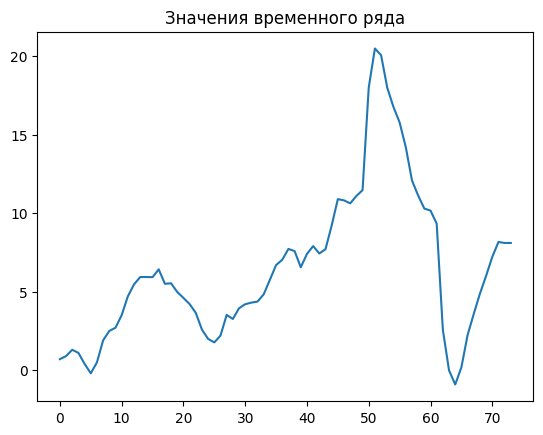

In [3]:
plt.plot(df["Значение"])
plt.title("Значения временного ряда")
plt.show()

In [4]:
print("Dickey-Fuller p-value", adfuller(df["Значение"])[1])

Dickey-Fuller p-value 0.7374671926800773


Гипотеза о нестационарности не отвергается. Будем считать, что ряд нестационарен.

Продифференцируем:

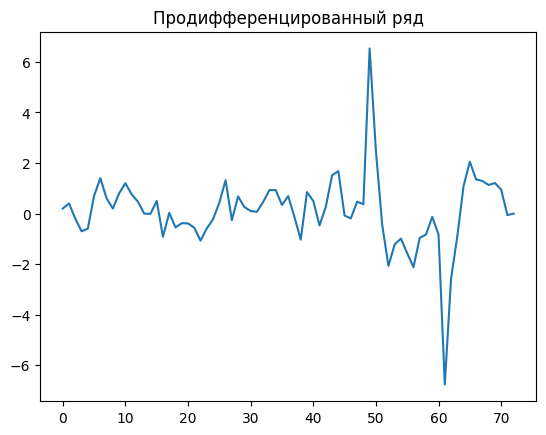

In [5]:
series = df["Значение"].to_numpy()

diff_series = series[1:] - series[:-1]

plt.plot(diff_series)
plt.title("Продифференцированный ряд")
plt.show()

Похоже на стационарный, но скачки в лагах 50 и 60.

In [6]:
print("Dickey-Fuller p-value", adfuller(diff_series)[1])

Dickey-Fuller p-value 0.027937626271298973


С уровнем значимости 0.05 будем считать, что теперь ряд стационарен.

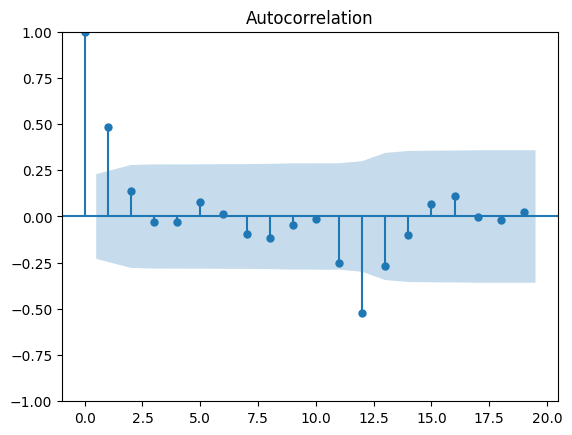

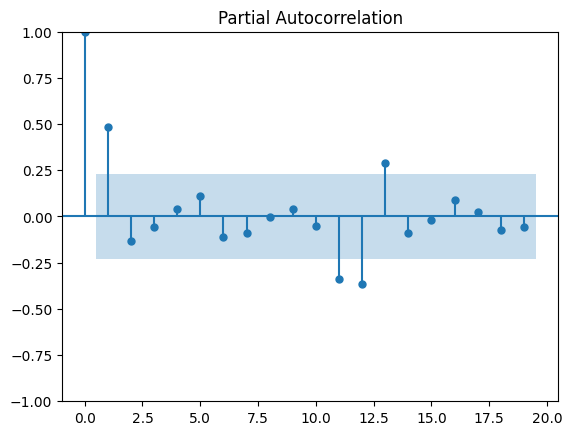

In [7]:
plot_acf(diff_series)
plot_pacf(diff_series)
plt.show()

Видно, что важен лишь первый лаг.

Скорее всего хватит какой-то простой модели (AR(1) или MA(1)).

In [8]:
arma = pm.auto_arima(diff_series,
                           trace=True,
                           information_criterion='bic')
arma.summary()

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=260.923, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=269.900, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=254.751, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=255.859, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=265.966, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=257.812, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=258.087, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=261.982, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=250.589, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=253.684, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=253.945, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=251.785, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=257.864, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.296 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   73
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -121.004
Date:                Mon, 24 Mar 2025   AIC                            246.008
Time:                        23:03:54   BIC                            250.589
Sample:                             0   HQIC                           247.834
                                 - 73                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4824      0.171      2.815      0.005       0.147       0.818
sigma2         1.6059      0.106     15.102      0.000       1.397       1.814
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               657.03
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):              13.90   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Поскольку сделали ряд стационарным, ожидаем, что ARIMA будет равна ARMA модели.

In [9]:
arima = pm.auto_arima(diff_series, information_criterion='bic', trace=True)
arma.summary()

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=260.923, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=269.900, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=254.751, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=255.859, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=265.966, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=257.812, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=258.087, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=261.982, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=250.589, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=253.684, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=253.945, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=251.785, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=257.864, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.106 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   73
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -121.004
Date:                Mon, 24 Mar 2025   AIC                            246.008
Time:                        23:03:54   BIC                            250.589
Sample:                             0   HQIC                           247.834
                                 - 73                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4824      0.171      2.815      0.005       0.147       0.818
sigma2         1.6059      0.106     15.102      0.000       1.397       1.814
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               657.03
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):              13.90   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Отметим, что для исходного ряда лучшая модель - ARIMA(1, 1, 0) (один раз дифференцировали).

In [10]:
arima = pm.auto_arima(series, information_criterion='bic', trace=True)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=260.923, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=269.900, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=254.751, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=255.859, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=265.966, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=257.812, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=258.087, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=261.982, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=250.589, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0]             : BIC=253.684, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=253.945, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=251.785, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0]             : BIC=257.864, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.117 seconds


К исходным данным лучшая модель - ARIMA(1,1,0)(0,0,0)[0], будем работать с ней.

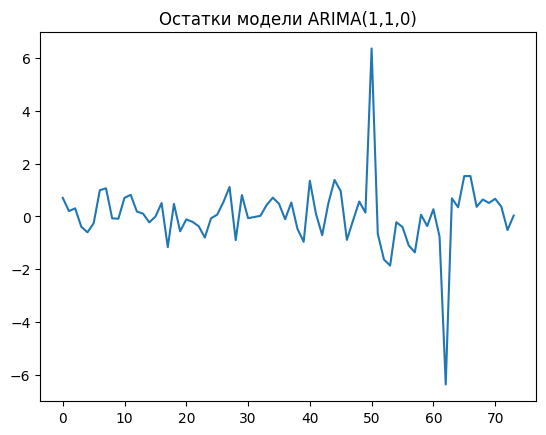

In [11]:
plt.plot(arima.resid())
plt.title("Остатки модели ARIMA(1,1,0)")
plt.show()

In [12]:
print("Dickey-Fuller p-value", adfuller(arima.resid())[1])

Dickey-Fuller p-value 2.4707519538427246e-05


Модель со стационарными остатками со скачками в тех самых лагах 50 и 60.

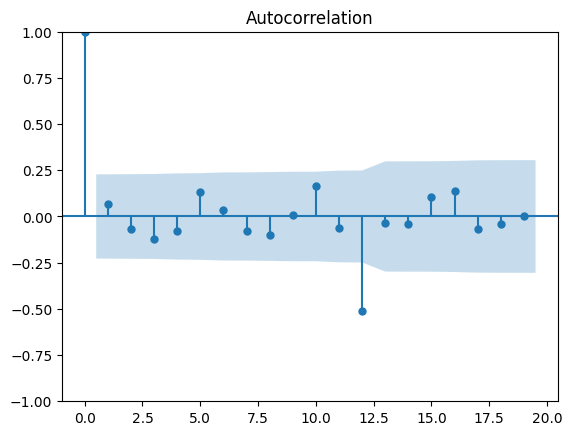

In [13]:
plot_acf(arima.resid())
plt.show()

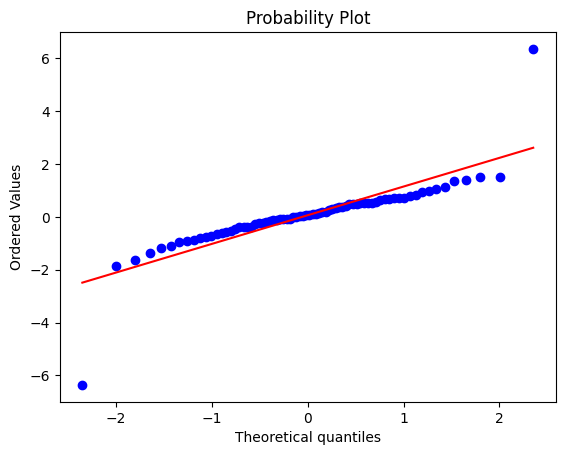

In [14]:
stats.probplot(arima.resid(), dist="norm", plot=pylab)
pylab.show()

In [15]:
print("Kolmogorov-Smirnov normality p-value", round(kstest_normal(arima.resid(), dist='norm', pvalmethod='table')[1], 5))

Kolmogorov-Smirnov normality p-value 0.001


Получили стационарный ряд в остатках. Модель адекватная, тип распределения остатков - белый шум. В хвостах странные точки, нормальность под вопросом.

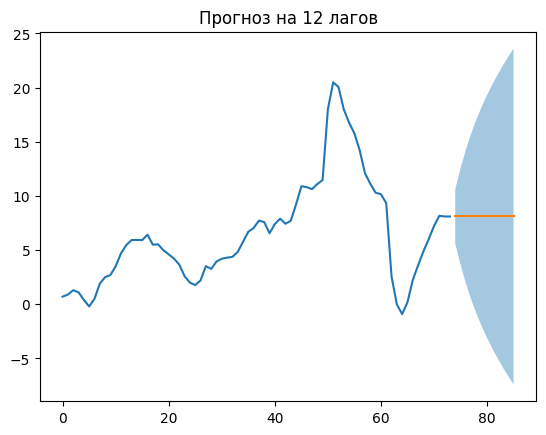

In [16]:
forecast = arima.predict(12, return_conf_int=True, alpha=0.05)

plt.plot(list(range(len(series))), series)
plt.plot(list(range(len(series), len(series) + len(forecast[0]))), forecast[0])
plt.fill_between(list(range(len(series), len(series) + len(forecast[0]))),
                 forecast[1][:, 0], forecast[1][:, 1], alpha=0.4)
plt.title("Прогноз на 12 лагов")
plt.show()

Могло бы быть и интересней, но глядя на график не сказать, как спрогнозировать лучше.

Хольт-Уинтерс

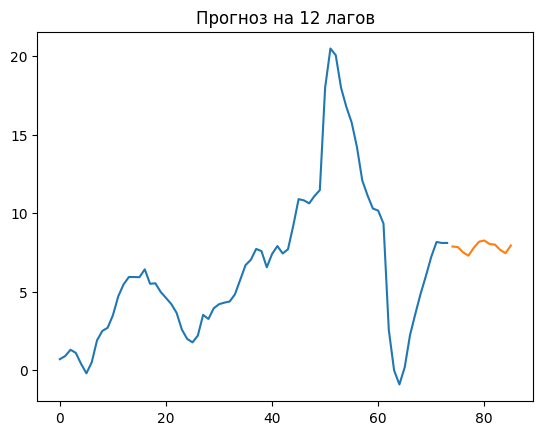

In [17]:
hw = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=7).fit()
forecast = hw.forecast(12)

plt.plot(list(range(len(series))), series)
plt.plot(list(range(len(series), len(series) + len(forecast))), forecast)
plt.title("Прогноз на 12 лагов")
plt.show()

Это уже поинтересней, однако суть та же, прогноз вокруг последнего значения ряда.

Сравнение

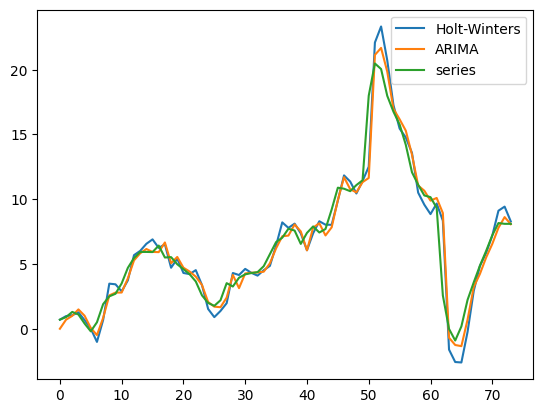

In [18]:
plt.plot(ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=7).fit().fittedvalues, label="Holt-Winters")
plt.plot(arima.predict_in_sample(series), label="ARIMA")
plt.plot(series, label="series")
plt.legend()
plt.show()

Все молодцы, но ARIMA лучше описала скачки. Хольт-Уинтерс больше сглаживает.